# 1. Importation et installation des dépendances

In [2]:
!pip install tensorflow matplotlib mediapipe opencv-python

In [7]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Points clés en utilisant MP Holistic

In [9]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [10]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [11]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [12]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 


In [14]:
cap = cv2.VideoCapture(0)

# Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)

        # Print face, pose, and hand landmarks
        if results.face_landmarks:
            print("Face landmarks:")
            print(results.face_landmarks.landmark)
        
        if results.pose_landmarks:
            print("Pose landmarks:")
            print(results.pose_landmarks.landmark)
        
        if results.left_hand_landmarks:
            print("Left hand landmarks:")
            print(results.left_hand_landmarks.landmark)

        if results.right_hand_landmarks:
            print("Right hand landmarks:")
            print(results.right_hand_landmarks.landmark)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

Face landmarks:
[x: 0.49072977900505066
y: 0.734651505947113
z: -0.036591075360774994
, x: 0.49716290831565857
y: 0.6683974862098694
z: -0.07143286615610123
, x: 0.4928068518638611
y: 0.6890280842781067
z: -0.03730708733201027
, x: 0.4828799068927765
y: 0.6074018478393555
z: -0.05669744685292244
, x: 0.4977705180644989
y: 0.6488367915153503
z: -0.07637947052717209
, x: 0.49687114357948303
y: 0.6242440342903137
z: -0.07173258066177368
, x: 0.4928217828273773
y: 0.5664246678352356
z: -0.037449341267347336
, x: 0.3863484561443329
y: 0.5623311996459961
z: 0.004076926503330469
, x: 0.4917476773262024
y: 0.5187137722969055
z: -0.02990480698645115
, x: 0.49213817715644836
y: 0.49220532178878784
z: -0.033509332686662674
, x: 0.4912707507610321
y: 0.39751482009887695
z: -0.022667057812213898
, x: 0.49017202854156494
y: 0.7446664571762085
z: -0.034255001693964005
, x: 0.48924607038497925
y: 0.7524347305297852
z: -0.029542066156864166
, x: 0.4882653057575226
y: 0.7554250359535217
z: -0.0233934801

Face landmarks:
[x: 0.48741722106933594
y: 0.7381448745727539
z: -0.038858942687511444
, x: 0.49330344796180725
y: 0.6726041436195374
z: -0.07161656022071838
, x: 0.4894004166126251
y: 0.6929696202278137
z: -0.03782956302165985
, x: 0.4791243374347687
y: 0.6113209128379822
z: -0.055498428642749786
, x: 0.49381470680236816
y: 0.6532335877418518
z: -0.07628072053194046
, x: 0.4929220378398895
y: 0.628611147403717
z: -0.0711139515042305
, x: 0.4892204999923706
y: 0.5697349905967712
z: -0.03546644374728203
, x: 0.38247865438461304
y: 0.5627214312553406
z: 0.0074261026456952095
, x: 0.48823297023773193
y: 0.521200954914093
z: -0.027138499543070793
, x: 0.4885929226875305
y: 0.4944157004356384
z: -0.030286017805337906
, x: 0.487845242023468
y: 0.3971629738807678
z: -0.01667313650250435
, x: 0.4868737757205963
y: 0.7482127547264099
z: -0.0368773452937603
, x: 0.4860318899154663
y: 0.7562795877456665
z: -0.03216616436839104
, x: 0.48520201444625854
y: 0.7597364783287048
z: -0.02598589472472667

Face landmarks:
[x: 0.4837433099746704
y: 0.7428126931190491
z: -0.03691956400871277
, x: 0.48954784870147705
y: 0.6750344634056091
z: -0.06977656483650208
, x: 0.485755980014801
y: 0.6956191062927246
z: -0.03627621755003929
, x: 0.4758940041065216
y: 0.6131382584571838
z: -0.0549047589302063
, x: 0.4901271462440491
y: 0.6554672718048096
z: -0.07454177737236023
, x: 0.48937875032424927
y: 0.6305002570152283
z: -0.06986093521118164
, x: 0.4861643612384796
y: 0.5708222389221191
z: -0.03600989654660225
, x: 0.38232406973838806
y: 0.5660292506217957
z: 0.005937014706432819
, x: 0.485358864068985
y: 0.5212110877037048
z: -0.028645779937505722
, x: 0.4857562184333801
y: 0.49413880705833435
z: -0.032043006271123886
, x: 0.48535922169685364
y: 0.39858758449554443
z: -0.020198389887809753
, x: 0.4831680357456207
y: 0.7529167532920837
z: -0.03488347679376602
, x: 0.4823698401451111
y: 0.7610806822776794
z: -0.030117563903331757
, x: 0.48160284757614136
y: 0.7646962404251099
z: -0.023967036977410

Face landmarks:
[x: 0.48184454441070557
y: 0.7392134070396423
z: -0.038013093173503876
, x: 0.4865748882293701
y: 0.670192301273346
z: -0.07023271918296814
, x: 0.4835537374019623
y: 0.6915006041526794
z: -0.03704904392361641
, x: 0.47307372093200684
y: 0.6096277236938477
z: -0.05434852093458176
, x: 0.486996054649353
y: 0.6507537961006165
z: -0.07485049217939377
, x: 0.48634645342826843
y: 0.6263556480407715
z: -0.06989055126905441
, x: 0.48369306325912476
y: 0.5684142708778381
z: -0.035138145089149475
, x: 0.38054072856903076
y: 0.5649242997169495
z: 0.009056581184267998
, x: 0.4829223155975342
y: 0.5189924240112305
z: -0.027199259027838707
, x: 0.4831629991531372
y: 0.49212968349456787
z: -0.030296072363853455
, x: 0.4825594127178192
y: 0.39862310886383057
z: -0.017488306388258934
, x: 0.48139914870262146
y: 0.7494953274726868
z: -0.03602711856365204
, x: 0.480778306722641
y: 0.7579866647720337
z: -0.03131573647260666
, x: 0.4801897704601288
y: 0.761885404586792
z: -0.02522250823676

Face landmarks:
[x: 0.47993361949920654
y: 0.7380668520927429
z: -0.03866034746170044
, x: 0.4858250021934509
y: 0.6680936217308044
z: -0.06968823820352554
, x: 0.48237061500549316
y: 0.6901341676712036
z: -0.03683966025710106
, x: 0.4728965759277344
y: 0.6087173223495483
z: -0.05368449166417122
, x: 0.4864947199821472
y: 0.6488337516784668
z: -0.07422073185443878
, x: 0.4860800504684448
y: 0.6249274611473083
z: -0.06913390755653381
, x: 0.4838946759700775
y: 0.5685451626777649
z: -0.034312475472688675
, x: 0.38037943840026855
y: 0.5658425688743591
z: 0.008855276741087437
, x: 0.48359179496765137
y: 0.5195029973983765
z: -0.02642587572336197
, x: 0.4841030538082123
y: 0.4928085207939148
z: -0.029479781165719032
, x: 0.4842877686023712
y: 0.40059125423431396
z: -0.016264788806438446
, x: 0.47933560609817505
y: 0.7483831644058228
z: -0.036779943853616714
, x: 0.4785769581794739
y: 0.7572121024131775
z: -0.03208267688751221
, x: 0.47789111733436584
y: 0.7615323066711426
z: -0.026013692840

Face landmarks:
[x: 0.47872209548950195
y: 0.7408581376075745
z: -0.037666697055101395
, x: 0.4841102659702301
y: 0.6698822975158691
z: -0.06978529691696167
, x: 0.48104235529899597
y: 0.6917982697486877
z: -0.03680504485964775
, x: 0.47126367688179016
y: 0.6100709438323975
z: -0.05414402484893799
, x: 0.48471787571907043
y: 0.6505833864212036
z: -0.07443000376224518
, x: 0.48435768485069275
y: 0.626499593257904
z: -0.06958260387182236
, x: 0.48243284225463867
y: 0.5696123838424683
z: -0.035204220563173294
, x: 0.38061726093292236
y: 0.5676343441009521
z: 0.008918780833482742
, x: 0.4821941554546356
y: 0.5204745531082153
z: -0.027483215555548668
, x: 0.4827125668525696
y: 0.49371349811553955
z: -0.03058401122689247
, x: 0.48300909996032715
y: 0.4026576578617096
z: -0.018038099631667137
, x: 0.478164941072464
y: 0.7512200474739075
z: -0.0356518030166626
, x: 0.47744813561439514
y: 0.7597940564155579
z: -0.030905360355973244
, x: 0.4768456816673279
y: 0.7637981176376343
z: -0.02480648458

Face landmarks:
[x: 0.47876811027526855
y: 0.7422142624855042
z: -0.03707532212138176
, x: 0.4841446876525879
y: 0.6719949841499329
z: -0.06960674375295639
, x: 0.4809434711933136
y: 0.6934729218482971
z: -0.03640260919928551
, x: 0.4710841178894043
y: 0.6122377514839172
z: -0.054453302174806595
, x: 0.48471716046333313
y: 0.6528595685958862
z: -0.07438058406114578
, x: 0.4842624068260193
y: 0.6288016438484192
z: -0.06967972218990326
, x: 0.48202601075172424
y: 0.5716263651847839
z: -0.03571252524852753
, x: 0.37973204255104065
y: 0.5682492852210999
z: 0.007530553732067347
, x: 0.481625497341156
y: 0.522499680519104
z: -0.028323115780949593
, x: 0.4821120798587799
y: 0.495821088552475
z: -0.031665537506341934
, x: 0.4821591377258301
y: 0.4047037959098816
z: -0.01993144117295742
, x: 0.47823986411094666
y: 0.7523995637893677
z: -0.0349617674946785
, x: 0.47753822803497314
y: 0.7606679201126099
z: -0.030150916427373886
, x: 0.4769059121608734
y: 0.7644001245498657
z: -0.02403801307082176

Face landmarks:
[x: 0.4792563021183014
y: 0.7411106824874878
z: -0.03661373630166054
, x: 0.48406797647476196
y: 0.6716821789741516
z: -0.06909110397100449
, x: 0.4810778796672821
y: 0.6929012537002563
z: -0.03594442084431648
, x: 0.47082844376564026
y: 0.6119593381881714
z: -0.05420628562569618
, x: 0.48454850912094116
y: 0.6525015830993652
z: -0.07388285547494888
, x: 0.4840044379234314
y: 0.6284200549125671
z: -0.06926434487104416
, x: 0.48162707686424255
y: 0.5713827013969421
z: -0.03582919016480446
, x: 0.3790399730205536
y: 0.5681506395339966
z: 0.00747568067163229
, x: 0.4810924232006073
y: 0.5216631293296814
z: -0.02869858779013157
, x: 0.48147696256637573
y: 0.49483156204223633
z: -0.032180771231651306
, x: 0.4812607169151306
y: 0.40261125564575195
z: -0.02103494480252266
, x: 0.4787953794002533
y: 0.7513269186019897
z: -0.03460007533431053
, x: 0.47815337777137756
y: 0.7598282694816589
z: -0.029841268435120583
, x: 0.47756585478782654
y: 0.7638255953788757
z: -0.0237704589962

Face landmarks:
[x: 0.4787261188030243
y: 0.7415435910224915
z: -0.03698676824569702
, x: 0.4839583933353424
y: 0.6719115376472473
z: -0.06905321031808853
, x: 0.4810151755809784
y: 0.6932026147842407
z: -0.03632604330778122
, x: 0.47139275074005127
y: 0.6118846535682678
z: -0.05360095947980881
, x: 0.4845450222492218
y: 0.6526756882667542
z: -0.0736769288778305
, x: 0.48420679569244385
y: 0.6285432577133179
z: -0.0688798651099205
, x: 0.4824266731739044
y: 0.5713250041007996
z: -0.0349736250936985
, x: 0.3818185329437256
y: 0.5672566890716553
z: 0.008845124393701553
, x: 0.48223596811294556
y: 0.5228685736656189
z: -0.027397794649004936
, x: 0.4827343225479126
y: 0.4963621497154236
z: -0.030509604141116142
, x: 0.48290854692459106
y: 0.4039406180381775
z: -0.01821678876876831
, x: 0.47822898626327515
y: 0.7518141865730286
z: -0.03501071408390999
, x: 0.4775584936141968
y: 0.7602173089981079
z: -0.03035910800099373
, x: 0.477035254240036
y: 0.7640419602394104
z: -0.02435453049838543
, 

Face landmarks:
[x: 0.4796808362007141
y: 0.739018976688385
z: -0.039004869759082794
, x: 0.4846334159374237
y: 0.669967532157898
z: -0.06983567029237747
, x: 0.48144832253456116
y: 0.6915203928947449
z: -0.037373319268226624
, x: 0.4712468683719635
y: 0.6100701689720154
z: -0.05318472534418106
, x: 0.485108345746994
y: 0.6506772041320801
z: -0.07418205589056015
, x: 0.484470009803772
y: 0.6265249252319336
z: -0.06887396425008774
, x: 0.48187318444252014
y: 0.5693544149398804
z: -0.03317319229245186
, x: 0.3788412809371948
y: 0.5664588809013367
z: 0.009959722869098186
, x: 0.48127537965774536
y: 0.5193243026733398
z: -0.024352481588721275
, x: 0.48164352774620056
y: 0.4922894239425659
z: -0.02692343480885029
, x: 0.4810141324996948
y: 0.40007513761520386
z: -0.012452684342861176
, x: 0.4792126417160034
y: 0.7491852045059204
z: -0.037151966243982315
, x: 0.47851717472076416
y: 0.7576420307159424
z: -0.032541900873184204
, x: 0.4778863489627838
y: 0.7615952491760254
z: -0.026583552360534

Face landmarks:
[x: 0.4861639142036438
y: 0.7202905416488647
z: -0.03850221633911133
, x: 0.4904231131076813
y: 0.6536889672279358
z: -0.06785161048173904
, x: 0.4885844886302948
y: 0.6755145192146301
z: -0.03666452690958977
, x: 0.47968342900276184
y: 0.5952571034431458
z: -0.05038588494062424
, x: 0.4909975230693817
y: 0.6344669461250305
z: -0.07188034057617188
, x: 0.4912489056587219
y: 0.61099773645401
z: -0.06653226166963577
, x: 0.4913780987262726
y: 0.5567177534103394
z: -0.031518954783678055
, x: 0.39559406042099
y: 0.5548306703567505
z: 0.016124753281474113
, x: 0.4920448362827301
y: 0.5114642381668091
z: -0.022820645943284035
, x: 0.49274325370788574
y: 0.48579782247543335
z: -0.025094149634242058
, x: 0.49428269267082214
y: 0.395532488822937
z: -0.010043960064649582
, x: 0.48568493127822876
y: 0.7301453351974487
z: -0.03686656430363655
, x: 0.48521506786346436
y: 0.7384317517280579
z: -0.03262212127447128
, x: 0.48496806621551514
y: 0.7422419190406799
z: -0.02696854434907436

Face landmarks:
[x: 0.4751526415348053
y: 0.715357780456543
z: -0.038411300629377365
, x: 0.4771636426448822
y: 0.6493867039680481
z: -0.06694206595420837
, x: 0.4764373004436493
y: 0.67171710729599
z: -0.03657162934541702
, x: 0.4669513404369354
y: 0.592547595500946
z: -0.048792362213134766
, x: 0.4775218367576599
y: 0.6304391622543335
z: -0.07078016549348831
, x: 0.4779636859893799
y: 0.6076181530952454
z: -0.06520769000053406
, x: 0.47888463735580444
y: 0.5553702712059021
z: -0.030010607093572617
, x: 0.386171817779541
y: 0.5555372834205627
z: 0.019601108506321907
, x: 0.4798160493373871
y: 0.5108083486557007
z: -0.020567961037158966
, x: 0.4805295169353485
y: 0.4854522943496704
z: -0.022434215992689133
, x: 0.4821787476539612
y: 0.3980971574783325
z: -0.006661713123321533
, x: 0.4748378396034241
y: 0.725093424320221
z: -0.03689486160874367
, x: 0.47456368803977966
y: 0.7332988381385803
z: -0.032717715948820114
, x: 0.4745139479637146
y: 0.7371792197227478
z: -0.02724216878414154
, 

Face landmarks:
[x: 0.47037264704704285
y: 0.7106080651283264
z: -0.0380752831697464
, x: 0.47147831320762634
y: 0.6441760063171387
z: -0.06581664830446243
, x: 0.47154179215431213
y: 0.6667875647544861
z: -0.03600117564201355
, x: 0.46215498447418213
y: 0.589171290397644
z: -0.04772919788956642
, x: 0.4718751609325409
y: 0.6256121397018433
z: -0.0695970207452774
, x: 0.4725225269794464
y: 0.6035267114639282
z: -0.06413806974887848
, x: 0.4743973910808563
y: 0.5532246828079224
z: -0.02956097386777401
, x: 0.38439351320266724
y: 0.5547971725463867
z: 0.020916827023029327
, x: 0.4756644368171692
y: 0.510319709777832
z: -0.02057042345404625
, x: 0.47643953561782837
y: 0.4855830669403076
z: -0.022522155195474625
, x: 0.47897520661354065
y: 0.39987123012542725
z: -0.006948519963771105
, x: 0.47011834383010864
y: 0.7201507091522217
z: -0.03660253807902336
, x: 0.4699706435203552
y: 0.7281782031059265
z: -0.03247096389532089
, x: 0.4700062870979309
y: 0.7319542765617371
z: -0.0270609781146049

Face landmarks:
[x: 0.46365123987197876
y: 0.7184087634086609
z: -0.037563711404800415
, x: 0.46491241455078125
y: 0.6553314328193665
z: -0.06705671548843384
, x: 0.46550244092941284
y: 0.6763116717338562
z: -0.0360490120947361
, x: 0.4568832218647003
y: 0.597808301448822
z: -0.048900097608566284
, x: 0.4654035270214081
y: 0.6365727186203003
z: -0.0710979700088501
, x: 0.46666866540908813
y: 0.6134819984436035
z: -0.06573552638292313
, x: 0.47030016779899597
y: 0.5601202845573425
z: -0.031160591170191765
, x: 0.3812129497528076
y: 0.5569149255752563
z: 0.023019468411803246
, x: 0.47241610288619995
y: 0.5152963995933533
z: -0.02203349396586418
, x: 0.4733283817768097
y: 0.4902467131614685
z: -0.024284586310386658
, x: 0.47660091519355774
y: 0.40182074904441833
z: -0.009210132993757725
, x: 0.46328994631767273
y: 0.72771155834198
z: -0.03597747161984444
, x: 0.463246613740921
y: 0.7354892492294312
z: -0.031713616102933884
, x: 0.46353790163993835
y: 0.7391290068626404
z: -0.0261527765542

Face landmarks:
[x: 0.47071531414985657
y: 0.7239612340927124
z: -0.03532824292778969
, x: 0.4720207750797272
y: 0.6611664891242981
z: -0.06654348969459534
, x: 0.4722544252872467
y: 0.6813867688179016
z: -0.034860461950302124
, x: 0.463730126619339
y: 0.6024700999259949
z: -0.05028726905584335
, x: 0.47260135412216187
y: 0.6423580646514893
z: -0.07101693749427795
, x: 0.4737771153450012
y: 0.6188551783561707
z: -0.06630398333072662
, x: 0.4771091639995575
y: 0.5640131831169128
z: -0.03372196853160858
, x: 0.38658374547958374
y: 0.5581701993942261
z: 0.01852656714618206
, x: 0.47929543256759644
y: 0.5180132389068604
z: -0.02624664083123207
, x: 0.48035958409309387
y: 0.4926145076751709
z: -0.02936811000108719
, x: 0.4839210510253906
y: 0.4031260013580322
z: -0.017524676397442818
, x: 0.4703688323497772
y: 0.7333857417106628
z: -0.033529963344335556
, x: 0.4702979326248169
y: 0.7411796450614929
z: -0.02910344861447811
, x: 0.4704739451408386
y: 0.7447753548622131
z: -0.02341884933412075

Face landmarks:
[x: 0.4716697633266449
y: 0.7260099649429321
z: -0.03737186640501022
, x: 0.4733268618583679
y: 0.6620686054229736
z: -0.06740787625312805
, x: 0.4734615385532379
y: 0.6828630566596985
z: -0.03607865795493126
, x: 0.4649398624897003
y: 0.6035111546516418
z: -0.04966050758957863
, x: 0.4738956093788147
y: 0.6432037949562073
z: -0.07154905050992966
, x: 0.47504809498786926
y: 0.6198000311851501
z: -0.06627747416496277
, x: 0.47821319103240967
y: 0.565172016620636
z: -0.03174354135990143
, x: 0.3872328996658325
y: 0.5596407055854797
z: 0.020753856748342514
, x: 0.4802052974700928
y: 0.5195682048797607
z: -0.022855011746287346
, x: 0.4811996817588806
y: 0.49425673484802246
z: -0.025277918204665184
, x: 0.4845152199268341
y: 0.40535280108451843
z: -0.010705333203077316
, x: 0.4712977707386017
y: 0.7354519367218018
z: -0.03571764752268791
, x: 0.47119438648223877
y: 0.7431977391242981
z: -0.031389668583869934
, x: 0.47137513756752014
y: 0.7467228770256042
z: -0.02575384452939

Face landmarks:
[x: 0.47266170382499695
y: 0.7268544435501099
z: -0.03651382401585579
, x: 0.4742952585220337
y: 0.6625024676322937
z: -0.06722982972860336
, x: 0.47419601678848267
y: 0.6831181049346924
z: -0.03576791286468506
, x: 0.4652840793132782
y: 0.6046625375747681
z: -0.0502113401889801
, x: 0.4747718572616577
y: 0.643859326839447
z: -0.07153090834617615
, x: 0.47569212317466736
y: 0.6207106709480286
z: -0.06647830456495285
, x: 0.47824037075042725
y: 0.5668038129806519
z: -0.032611627131700516
, x: 0.38682693243026733
y: 0.5605247020721436
z: 0.018694428727030754
, x: 0.48004350066185
y: 0.5208668112754822
z: -0.024164903908967972
, x: 0.4809862971305847
y: 0.49569427967071533
z: -0.026863042265176773
, x: 0.4841018319129944
y: 0.4076704978942871
z: -0.013467412441968918
, x: 0.4723004102706909
y: 0.7362923622131348
z: -0.03475962206721306
, x: 0.47213098406791687
y: 0.7440024018287659
z: -0.03040207549929619
, x: 0.4722132980823517
y: 0.7474638223648071
z: -0.0247708708047866

Face landmarks:
[x: 0.47085943818092346
y: 0.7277207374572754
z: -0.035842616111040115
, x: 0.4725704789161682
y: 0.6659390330314636
z: -0.06634529680013657
, x: 0.4723302125930786
y: 0.6853170394897461
z: -0.03499750792980194
, x: 0.46346932649612427
y: 0.6069455146789551
z: -0.049629095941782
, x: 0.4730430543422699
y: 0.6473388075828552
z: -0.0706559494137764
, x: 0.47387754917144775
y: 0.6237671971321106
z: -0.06566577404737473
, x: 0.4761970043182373
y: 0.568069338798523
z: -0.03239872679114342
, x: 0.3843268156051636
y: 0.5592412948608398
z: 0.018275395035743713
, x: 0.4777703881263733
y: 0.5212099552154541
z: -0.024171095341444016
, x: 0.47858986258506775
y: 0.49578696489334106
z: -0.026980193331837654
, x: 0.48113057017326355
y: 0.4060395359992981
z: -0.01390087604522705
, x: 0.47053834795951843
y: 0.7369341254234314
z: -0.0341244637966156
, x: 0.4703862965106964
y: 0.7444823384284973
z: -0.02979251556098461
, x: 0.4704890549182892
y: 0.747944176197052
z: -0.024199888110160828


Face landmarks:
[x: 0.47399821877479553
y: 0.7254000306129456
z: -0.040363702923059464
, x: 0.47823435068130493
y: 0.6616395711898804
z: -0.06787142157554626
, x: 0.47640207409858704
y: 0.6827327013015747
z: -0.037470053881406784
, x: 0.467776358127594
y: 0.6041181683540344
z: -0.04842724651098251
, x: 0.4789091646671295
y: 0.6429563760757446
z: -0.0715065523982048
, x: 0.4792628288269043
y: 0.6200540661811829
z: -0.0654413029551506
, x: 0.47985100746154785
y: 0.5663101077079773
z: -0.028314674273133278
, x: 0.38221096992492676
y: 0.5612318515777588
z: 0.02085963450372219
, x: 0.48088693618774414
y: 0.5192565321922302
z: -0.017639681696891785
, x: 0.4817444980144501
y: 0.49357789754867554
z: -0.019007058814167976
, x: 0.48360270261764526
y: 0.4059982895851135
z: -0.0010105898836627603
, x: 0.47345203161239624
y: 0.7348688244819641
z: -0.03894757479429245
, x: 0.4729921221733093
y: 0.7428923845291138
z: -0.03483375906944275
, x: 0.47272488474845886
y: 0.7468118667602539
z: -0.0294141508

Face landmarks:
[x: 0.4773187041282654
y: 0.7269119620323181
z: -0.04058612883090973
, x: 0.48165327310562134
y: 0.661996603012085
z: -0.06804242730140686
, x: 0.4798296093940735
y: 0.683295488357544
z: -0.03755171224474907
, x: 0.4719713032245636
y: 0.6033598184585571
z: -0.048834990710020065
, x: 0.4825209975242615
y: 0.6430002450942993
z: -0.07169222086668015
, x: 0.4831250011920929
y: 0.6196827292442322
z: -0.06571464985609055
, x: 0.48443666100502014
y: 0.5653060674667358
z: -0.02872263826429844
, x: 0.3883259892463684
y: 0.5587133169174194
z: 0.01989675685763359
, x: 0.4859977066516876
y: 0.5190507173538208
z: -0.018360236659646034
, x: 0.48714765906333923
y: 0.49341118335723877
z: -0.019750067964196205
, x: 0.4900228977203369
y: 0.4046027958393097
z: -0.0017039020312950015
, x: 0.47675344347953796
y: 0.7366124391555786
z: -0.03914349153637886
, x: 0.47627440094947815
y: 0.7447826862335205
z: -0.03496766835451126
, x: 0.47601714730262756
y: 0.7487042546272278
z: -0.02948111481964

Face landmarks:
[x: 0.47595661878585815
y: 0.7280020713806152
z: -0.03843255341053009
, x: 0.47849398851394653
y: 0.6645720601081848
z: -0.06634558737277985
, x: 0.47766992449760437
y: 0.6852749586105347
z: -0.03631209209561348
, x: 0.4689826965332031
y: 0.6058454513549805
z: -0.04794903099536896
, x: 0.4790671169757843
y: 0.645622730255127
z: -0.07010889798402786
, x: 0.4796910583972931
y: 0.6221945881843567
z: -0.06450136005878448
, x: 0.4813809394836426
y: 0.5673314929008484
z: -0.029101381078362465
, x: 0.38873720169067383
y: 0.5620275139808655
z: 0.020603744313120842
, x: 0.4828268587589264
y: 0.5199571847915649
z: -0.019302211701869965
, x: 0.4837431311607361
y: 0.494141161441803
z: -0.02096567675471306
, x: 0.4861620366573334
y: 0.4066005349159241
z: -0.004711518529802561
, x: 0.47557497024536133
y: 0.737573504447937
z: -0.036925725638866425
, x: 0.475335031747818
y: 0.7456620335578918
z: -0.03278345242142677
, x: 0.4753637909889221
y: 0.7495130896568298
z: -0.027384039014577866

Face landmarks:
[x: 0.4761817455291748
y: 0.7289862632751465
z: -0.037946347147226334
, x: 0.4792819023132324
y: 0.6636949181556702
z: -0.06686080992221832
, x: 0.4783075451850891
y: 0.6846903562545776
z: -0.03640710562467575
, x: 0.4701656401157379
y: 0.6054893732070923
z: -0.04877214878797531
, x: 0.48000162839889526
y: 0.6448981165885925
z: -0.07080043852329254
, x: 0.4808249771595001
y: 0.6217275857925415
z: -0.06532090157270432
, x: 0.48297736048698425
y: 0.5676125288009644
z: -0.03008265793323517
, x: 0.3900403678417206
y: 0.5613036155700684
z: 0.020113328471779823
, x: 0.4847713112831116
y: 0.5205254554748535
z: -0.02043098770081997
, x: 0.4858686923980713
y: 0.49496620893478394
z: -0.022288816049695015
, x: 0.4889841079711914
y: 0.4088174104690552
z: -0.006682292558252811
, x: 0.47570204734802246
y: 0.7386032342910767
z: -0.03630020096898079
, x: 0.4754028916358948
y: 0.7465442419052124
z: -0.03211282566189766
, x: 0.47538599371910095
y: 0.7502025961875916
z: -0.026652965694665

Face landmarks:
[x: 0.47420477867126465
y: 0.7310717701911926
z: -0.03769804909825325
, x: 0.4766428768634796
y: 0.6656982898712158
z: -0.06660919636487961
, x: 0.47592392563819885
y: 0.686875581741333
z: -0.03635570406913757
, x: 0.46683061122894287
y: 0.6070526242256165
z: -0.04849682375788689
, x: 0.47710245847702026
y: 0.6467140316963196
z: -0.07051989436149597
, x: 0.47763562202453613
y: 0.623269259929657
z: -0.06505053490400314
, x: 0.479117751121521
y: 0.5685167908668518
z: -0.029930364340543747
, x: 0.3867245018482208
y: 0.5639709830284119
z: 0.02041490562260151
, x: 0.48029813170433044
y: 0.5212779641151428
z: -0.020299769937992096
, x: 0.4810601770877838
y: 0.4954189658164978
z: -0.02211807854473591
, x: 0.4831172823905945
y: 0.40772467851638794
z: -0.006521875970065594
, x: 0.47383251786231995
y: 0.7407842874526978
z: -0.036060020327568054
, x: 0.47361868619918823
y: 0.7487460374832153
z: -0.031868886202573776
, x: 0.4736623167991638
y: 0.7523638606071472
z: -0.0264436230063

Face landmarks:
[x: 0.4705529808998108
y: 0.727399468421936
z: -0.03915388882160187
, x: 0.4715828001499176
y: 0.6607972979545593
z: -0.06735813617706299
, x: 0.4716004431247711
y: 0.6830253601074219
z: -0.03708278760313988
, x: 0.461662232875824
y: 0.6030917167663574
z: -0.0483878068625927
, x: 0.4718570113182068
y: 0.6417944431304932
z: -0.07117000967264175
, x: 0.4723794460296631
y: 0.6186827421188354
z: -0.06543096154928207
, x: 0.47416192293167114
y: 0.565284252166748
z: -0.02941184863448143
, x: 0.38180404901504517
y: 0.5635626912117004
z: 0.022630639374256134
, x: 0.47533050179481506
y: 0.5195232033729553
z: -0.019455112516880035
, x: 0.4759978950023651
y: 0.4940457046031952
z: -0.021080877631902695
, x: 0.4781167805194855
y: 0.4075525999069214
z: -0.00428779749199748
, x: 0.47030213475227356
y: 0.7372100353240967
z: -0.03755369782447815
, x: 0.47019830346107483
y: 0.7454617023468018
z: -0.03335723280906677
, x: 0.47029364109039307
y: 0.7493206858634949
z: -0.02789156325161457
,

Face landmarks:
[x: 0.47345441579818726
y: 0.7300584316253662
z: -0.03784417733550072
, x: 0.4748082458972931
y: 0.6654818058013916
z: -0.06606338173151016
, x: 0.47449564933776855
y: 0.6864516735076904
z: -0.03594213351607323
, x: 0.464715838432312
y: 0.6075637340545654
z: -0.04794315621256828
, x: 0.4751133918762207
y: 0.6466673612594604
z: -0.06991802901029587
, x: 0.4754822254180908
y: 0.6234669089317322
z: -0.06441165506839752
, x: 0.47663411498069763
y: 0.5692439675331116
z: -0.029455294832587242
, x: 0.3844195008277893
y: 0.566005289554596
z: 0.02060423232614994
, x: 0.4774726629257202
y: 0.5220244526863098
z: -0.019933095201849937
, x: 0.4780515730381012
y: 0.49642157554626465
z: -0.021813394501805305
, x: 0.47963786125183105
y: 0.4101814329624176
z: -0.006229556631296873
, x: 0.4732258915901184
y: 0.7395983934402466
z: -0.03632824867963791
, x: 0.4731155335903168
y: 0.747580349445343
z: -0.03219059854745865
, x: 0.4731956422328949
y: 0.7513554692268372
z: -0.02679005265235901


Face landmarks:
[x: 0.47387534379959106
y: 0.7272504568099976
z: -0.039998795837163925
, x: 0.4766303598880768
y: 0.6624162793159485
z: -0.066407710313797
, x: 0.47582319378852844
y: 0.6840123534202576
z: -0.03693410009145737
, x: 0.4668593406677246
y: 0.6051404476165771
z: -0.04703507944941521
, x: 0.4771127700805664
y: 0.6435781717300415
z: -0.0698874369263649
, x: 0.47758737206459045
y: 0.6206589341163635
z: -0.0638934075832367
, x: 0.4789294898509979
y: 0.5675946474075317
z: -0.027390383183956146
, x: 0.386546790599823
y: 0.5655263662338257
z: 0.022324219346046448
, x: 0.4800211489200592
y: 0.5215038061141968
z: -0.01686789095401764
, x: 0.48073044419288635
y: 0.4960338771343231
z: -0.017994850873947144
, x: 0.48260948061943054
y: 0.41001367568969727
z: 0.00016589545703027397
, x: 0.473471075296402
y: 0.7368659973144531
z: -0.03867025300860405
, x: 0.4732441008090973
y: 0.7450531721115112
z: -0.03467484563589096
, x: 0.4732522964477539
y: 0.7490239143371582
z: -0.029376821592450142

Face landmarks:
[x: 0.47501838207244873
y: 0.7277669310569763
z: -0.039110466837882996
, x: 0.4762305021286011
y: 0.6616233587265015
z: -0.06557287275791168
, x: 0.47575852274894714
y: 0.6840609312057495
z: -0.0363641232252121
, x: 0.46598437428474426
y: 0.6060273051261902
z: -0.047189705073833466
, x: 0.4765603244304657
y: 0.643002986907959
z: -0.06921372562646866
, x: 0.47682639956474304
y: 0.6207492351531982
z: -0.06348962336778641
, x: 0.47781312465667725
y: 0.569648802280426
z: -0.02808433771133423
, x: 0.3859691321849823
y: 0.567999005317688
z: 0.019832080230116844
, x: 0.47877660393714905
y: 0.5238157510757446
z: -0.018344104290008545
, x: 0.4794553220272064
y: 0.4985101819038391
z: -0.01977691799402237
, x: 0.4809824228286743
y: 0.41337481141090393
z: -0.0031752900686115026
, x: 0.4748183786869049
y: 0.7376254200935364
z: -0.03767894580960274
, x: 0.47463977336883545
y: 0.7462514638900757
z: -0.03356904163956642
, x: 0.4746292531490326
y: 0.7505939602851868
z: -0.02822300978004

Face landmarks:
[x: 0.4726477861404419
y: 0.7278315424919128
z: -0.03863144293427467
, x: 0.4745453894138336
y: 0.6623155474662781
z: -0.06479640305042267
, x: 0.47396188974380493
y: 0.6847096085548401
z: -0.03587398678064346
, x: 0.4649065136909485
y: 0.6061046719551086
z: -0.04630646854639053
, x: 0.4749903082847595
y: 0.6435928344726562
z: -0.06835315376520157
, x: 0.4754634499549866
y: 0.6210664510726929
z: -0.06266196817159653
, x: 0.4769299626350403
y: 0.5693396925926208
z: -0.027436457574367523
, x: 0.38566112518310547
y: 0.5685766339302063
z: 0.02091226913034916
, x: 0.4781206250190735
y: 0.5235557556152344
z: -0.01769065298140049
, x: 0.478870153427124
y: 0.49812033772468567
z: -0.019129479303956032
, x: 0.4805898368358612
y: 0.41282355785369873
z: -0.0025115287862718105
, x: 0.4723775088787079
y: 0.737434446811676
z: -0.037180542945861816
, x: 0.47217369079589844
y: 0.7456258535385132
z: -0.03310277312994003
, x: 0.47219860553741455
y: 0.749623715877533
z: -0.0278403144329786

In [15]:
draw_landmarks(frame, results)

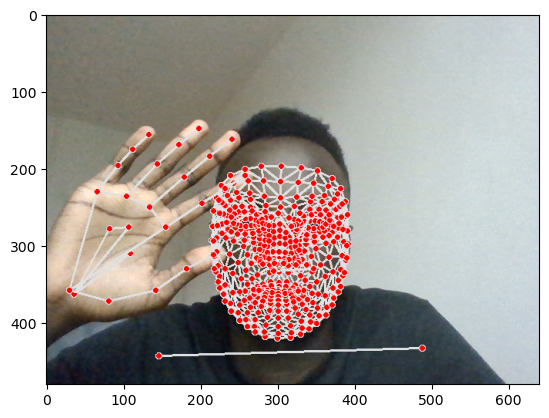

In [16]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extraction des valeurs des points clés

In [17]:
len(results.left_hand_landmarks.landmark)

AttributeError: 'NoneType' object has no attribute 'landmark'

In [18]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [19]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [20]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [21]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [22]:
result_test = extract_keypoints(results)

In [23]:
result_test

array([ 0.50767815,  0.61384207, -1.80271816, ...,  0.20813808,
        0.32649919, -0.06933855])

In [24]:
np.save('0', result_test)

In [25]:
np.load('0.npy')

array([ 0.50767815,  0.61384207, -1.80271816, ...,  0.20813808,
        0.32649919, -0.06933855])

# 4. Mise en place des dossiers pour la collecte des données

In [26]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 1

In [27]:
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    if not os.path.exists(action_path):
        os.makedirs(action_path)
    
    folder_list = os.listdir(action_path)
    if len(folder_list) > 0:
        dirmax = np.max(np.array(folder_list).astype(int))
    else:
        dirmax = 0

    for sequence in range(1, no_sequences + 1):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(dirmax + sequence)))
        except:
            pass


# 5. Collecte des valeurs des Keypoint pour l'entraînement et les tests

In [28]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [29]:
cap.release()
cv2.destroyAllWindows()

# 6. Prétraitement des données et création des étiquettes et des caractéristiques

In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [31]:
label_map = {label:num for num, label in enumerate(actions)}

In [32]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [33]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [34]:
np.array(sequences).shape

(90, 30, 1662)

In [35]:
np.array(labels).shape

(90,)

In [36]:
X = np.array(sequences)

In [37]:
X.shape

(90, 30, 1662)

In [38]:
y = to_categorical(labels).astype(int)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [40]:
y_test.shape

(5, 3)

# 7. Construction et entraînement du réseau neuronal LSTM

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [42]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [43]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [44]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [45]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 96ms/step - loss: 4.7459 - categorical_accuracy: 0.3294
Epoch 2/2000
3/3 [==============================] - 0s 71ms/step - loss: 4.8506 - categorical_accuracy: 0.3412
Epoch 3/2000
3/3 [==============================] - 0s 87ms/step - loss: 11.8594 - categorical_accuracy: 0.3294
Epoch 4/2000
3/3 [==============================] - 0s 62ms/step - loss: 4.5724 - categorical_accuracy: 0.3294
Epoch 5/2000
3/3 [==============================] - 0s 55ms/step - loss: 2.0722 - categorical_accuracy: 0.1765
Epoch 6/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.9657 - categorical_accuracy: 0.6941
Epoch 7/2000
3/3 [==============================] - 0s 52ms/step - loss: 0.5547 - categorical_accuracy: 0.7412
Epoch 8/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.1981 - categorical_accuracy: 0.5412
Epoch 9/2000
3/3 [==============================] - 0s 49ms/step - loss: 1.4548 - categorical_accuracy: 0.4235


3/3 [==============================] - 0s 89ms/step - loss: 1.6036 - categorical_accuracy: 0.3882
Epoch 75/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.4027 - categorical_accuracy: 0.3176
Epoch 76/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.3672 - categorical_accuracy: 0.4235
Epoch 77/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.3743 - categorical_accuracy: 0.4235
Epoch 78/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1972 - categorical_accuracy: 0.4824
Epoch 79/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.1698 - categorical_accuracy: 0.3882
Epoch 80/2000
3/3 [==============================] - 0s 62ms/step - loss: 1.1388 - categorical_accuracy: 0.4941
Epoch 81/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.4089 - categorical_accuracy: 0.3176
Epoch 82/2000
3/3 [==============================] - 0s 67ms/step - loss: 1.0992 - categorical_accuracy: 0.5294
Epoch

3/3 [==============================] - 0s 61ms/step - loss: 0.1805 - categorical_accuracy: 0.9529
Epoch 147/2000
3/3 [==============================] - 0s 73ms/step - loss: 0.1699 - categorical_accuracy: 0.9647
Epoch 148/2000
3/3 [==============================] - 0s 72ms/step - loss: 0.1660 - categorical_accuracy: 0.9529
Epoch 149/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.1543 - categorical_accuracy: 0.9529
Epoch 150/2000
3/3 [==============================] - 0s 62ms/step - loss: 0.1647 - categorical_accuracy: 0.9529
Epoch 151/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.1642 - categorical_accuracy: 0.9412
Epoch 152/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.1585 - categorical_accuracy: 0.9529
Epoch 153/2000
3/3 [==============================] - 0s 70ms/step - loss: 0.1365 - categorical_accuracy: 0.9529
Epoch 154/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.1361 - categorical_accuracy: 0.952

3/3 [==============================] - 0s 60ms/step - loss: 0.0977 - categorical_accuracy: 0.9765
Epoch 219/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.0845 - categorical_accuracy: 0.9882
Epoch 220/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0943 - categorical_accuracy: 0.9765
Epoch 221/2000
3/3 [==============================] - 0s 67ms/step - loss: 0.0793 - categorical_accuracy: 0.9882
Epoch 222/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.0854 - categorical_accuracy: 0.9882
Epoch 223/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.0770 - categorical_accuracy: 0.9882
Epoch 224/2000
3/3 [==============================] - 0s 54ms/step - loss: 0.0737 - categorical_accuracy: 0.9882
Epoch 225/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.0725 - categorical_accuracy: 0.9765
Epoch 226/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.0766 - categorical_accuracy: 0.988

3/3 [==============================] - 0s 122ms/step - loss: 0.5211 - categorical_accuracy: 0.8118
Epoch 291/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.0901 - categorical_accuracy: 0.9765
Epoch 292/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.1184 - categorical_accuracy: 0.9647
Epoch 293/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.1184 - categorical_accuracy: 0.9647
Epoch 294/2000
3/3 [==============================] - 0s 153ms/step - loss: 0.0693 - categorical_accuracy: 0.9882
Epoch 295/2000
3/3 [==============================] - 0s 57ms/step - loss: 0.0950 - categorical_accuracy: 0.9765
Epoch 296/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.0681 - categorical_accuracy: 0.9882
Epoch 297/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.0673 - categorical_accuracy: 0.9765
Epoch 298/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.0593 - categorical_accuracy: 0

3/3 [==============================] - 0s 57ms/step - loss: 0.9182 - categorical_accuracy: 0.5765
Epoch 363/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.8925 - categorical_accuracy: 0.6118
Epoch 364/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.8413 - categorical_accuracy: 0.6471
Epoch 365/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.7856 - categorical_accuracy: 0.6471
Epoch 366/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.7449 - categorical_accuracy: 0.6471
Epoch 367/2000
3/3 [==============================] - 0s 61ms/step - loss: 0.6957 - categorical_accuracy: 0.6471
Epoch 368/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.6480 - categorical_accuracy: 0.6471
Epoch 369/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.6006 - categorical_accuracy: 0.6471
Epoch 370/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.5617 - categorical_accuracy: 0.64

3/3 [==============================] - 0s 62ms/step - loss: 0.1841 - categorical_accuracy: 0.9529
Epoch 435/2000
3/3 [==============================] - 0s 59ms/step - loss: 0.1841 - categorical_accuracy: 0.9647
Epoch 436/2000
3/3 [==============================] - 0s 56ms/step - loss: 0.0746 - categorical_accuracy: 0.9882
Epoch 437/2000
3/3 [==============================] - 0s 60ms/step - loss: 0.0672 - categorical_accuracy: 0.9882
Epoch 438/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0671 - categorical_accuracy: 0.9765
Epoch 439/2000
3/3 [==============================] - 0s 55ms/step - loss: 0.0595 - categorical_accuracy: 0.9882
Epoch 440/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.0497 - categorical_accuracy: 0.9882
Epoch 441/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.0507 - categorical_accuracy: 0.9882
Epoch 442/2000
3/3 [==============================] - 0s 75ms/step - loss: 0.0414 - categorical_accuracy: 0.988

3/3 [==============================] - 0s 57ms/step - loss: 9.0028e-04 - categorical_accuracy: 1.0000
Epoch 507/2000
3/3 [==============================] - 0s 56ms/step - loss: 8.8141e-04 - categorical_accuracy: 1.0000
Epoch 508/2000
3/3 [==============================] - 0s 93ms/step - loss: 8.7886e-04 - categorical_accuracy: 1.0000
Epoch 509/2000
3/3 [==============================] - 0s 74ms/step - loss: 8.5304e-04 - categorical_accuracy: 1.0000
Epoch 510/2000
3/3 [==============================] - 0s 76ms/step - loss: 8.1427e-04 - categorical_accuracy: 1.0000
Epoch 511/2000
3/3 [==============================] - 0s 72ms/step - loss: 8.0482e-04 - categorical_accuracy: 1.0000
Epoch 512/2000
3/3 [==============================] - 0s 92ms/step - loss: 7.7627e-04 - categorical_accuracy: 1.0000
Epoch 513/2000
3/3 [==============================] - 0s 89ms/step - loss: 7.4574e-04 - categorical_accuracy: 1.0000
Epoch 514/2000
3/3 [==============================] - 0s 86ms/step - loss: 7.20

3/3 [==============================] - 0s 107ms/step - loss: 0.0963 - categorical_accuracy: 0.9647
Epoch 577/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.0775 - categorical_accuracy: 0.9765
Epoch 578/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0698 - categorical_accuracy: 0.9765
Epoch 579/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.0623 - categorical_accuracy: 0.9882
Epoch 580/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.0548 - categorical_accuracy: 0.9882
Epoch 581/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.0564 - categorical_accuracy: 0.9765
Epoch 582/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.0481 - categorical_accuracy: 0.9882
Epoch 583/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.0510 - categorical_accuracy: 0.9882
Epoch 584/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.0493 - categorical_accuracy: 0.

3/3 [==============================] - 0s 152ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 649/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 650/2000
3/3 [==============================] - 0s 63ms/step - loss: 0.0014 - categorical_accuracy: 1.0000
Epoch 651/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 652/2000
3/3 [==============================] - 0s 58ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 653/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.0013 - categorical_accuracy: 1.0000
Epoch 654/2000
3/3 [==============================] - 0s 66ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 655/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 656/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.0012 - categorical_accuracy: 1.

3/3 [==============================] - 0s 72ms/step - loss: 3.7461e-04 - categorical_accuracy: 1.0000
Epoch 719/2000
3/3 [==============================] - 0s 79ms/step - loss: 3.7011e-04 - categorical_accuracy: 1.0000
Epoch 720/2000
3/3 [==============================] - 0s 125ms/step - loss: 3.6645e-04 - categorical_accuracy: 1.0000
Epoch 721/2000
3/3 [==============================] - 0s 90ms/step - loss: 3.5956e-04 - categorical_accuracy: 1.0000
Epoch 722/2000
3/3 [==============================] - 0s 110ms/step - loss: 3.5563e-04 - categorical_accuracy: 1.0000
Epoch 723/2000
3/3 [==============================] - 0s 135ms/step - loss: 3.5108e-04 - categorical_accuracy: 1.0000
Epoch 724/2000
3/3 [==============================] - 0s 76ms/step - loss: 3.4861e-04 - categorical_accuracy: 1.0000
Epoch 725/2000
3/3 [==============================] - 0s 74ms/step - loss: 3.4264e-04 - categorical_accuracy: 1.0000
Epoch 726/2000
3/3 [==============================] - 0s 75ms/step - loss: 3

3/3 [==============================] - 0s 137ms/step - loss: 1.7981e-04 - categorical_accuracy: 1.0000
Epoch 789/2000
3/3 [==============================] - 0s 69ms/step - loss: 1.7880e-04 - categorical_accuracy: 1.0000
Epoch 790/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.7702e-04 - categorical_accuracy: 1.0000
Epoch 791/2000
3/3 [==============================] - 0s 60ms/step - loss: 1.7601e-04 - categorical_accuracy: 1.0000
Epoch 792/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.7426e-04 - categorical_accuracy: 1.0000
Epoch 793/2000
3/3 [==============================] - 0s 57ms/step - loss: 1.7315e-04 - categorical_accuracy: 1.0000
Epoch 794/2000
3/3 [==============================] - 0s 107ms/step - loss: 1.7181e-04 - categorical_accuracy: 1.0000
Epoch 795/2000
3/3 [==============================] - 0s 61ms/step - loss: 1.7040e-04 - categorical_accuracy: 1.0000
Epoch 796/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.

Epoch 858/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.1291e-04 - categorical_accuracy: 1.0000
Epoch 859/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.1225e-04 - categorical_accuracy: 1.0000
Epoch 860/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.1157e-04 - categorical_accuracy: 1.0000
Epoch 861/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.1105e-04 - categorical_accuracy: 1.0000
Epoch 862/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.1030e-04 - categorical_accuracy: 1.0000
Epoch 863/2000
3/3 [==============================] - 0s 56ms/step - loss: 1.0975e-04 - categorical_accuracy: 1.0000
Epoch 864/2000
3/3 [==============================] - 0s 58ms/step - loss: 1.0923e-04 - categorical_accuracy: 1.0000
Epoch 865/2000
3/3 [==============================] - 0s 59ms/step - loss: 1.0846e-04 - categorical_accuracy: 1.0000
Epoch 866/2000
3/3 [==============================] - 0s 56ms/st

3/3 [==============================] - 0s 60ms/step - loss: 7.7772e-05 - categorical_accuracy: 1.0000
Epoch 928/2000
3/3 [==============================] - 0s 128ms/step - loss: 7.7411e-05 - categorical_accuracy: 1.0000
Epoch 929/2000
3/3 [==============================] - 0s 71ms/step - loss: 7.7081e-05 - categorical_accuracy: 1.0000
Epoch 930/2000
3/3 [==============================] - 0s 71ms/step - loss: 7.6869e-05 - categorical_accuracy: 1.0000
Epoch 931/2000
3/3 [==============================] - 0s 56ms/step - loss: 7.6422e-05 - categorical_accuracy: 1.0000
Epoch 932/2000
3/3 [==============================] - 0s 56ms/step - loss: 7.6160e-05 - categorical_accuracy: 1.0000
Epoch 933/2000
3/3 [==============================] - 0s 97ms/step - loss: 7.5684e-05 - categorical_accuracy: 1.0000
Epoch 934/2000
3/3 [==============================] - 0s 61ms/step - loss: 7.5364e-05 - categorical_accuracy: 1.0000
Epoch 935/2000
3/3 [==============================] - 0s 57ms/step - loss: 7.4

Epoch 997/2000
3/3 [==============================] - 0s 65ms/step - loss: 5.7569e-05 - categorical_accuracy: 1.0000
Epoch 998/2000
3/3 [==============================] - 0s 61ms/step - loss: 5.7269e-05 - categorical_accuracy: 1.0000
Epoch 999/2000
3/3 [==============================] - 0s 72ms/step - loss: 5.7076e-05 - categorical_accuracy: 1.0000
Epoch 1000/2000
3/3 [==============================] - 0s 61ms/step - loss: 5.6870e-05 - categorical_accuracy: 1.0000
Epoch 1001/2000
3/3 [==============================] - 0s 64ms/step - loss: 5.6592e-05 - categorical_accuracy: 1.0000
Epoch 1002/2000
3/3 [==============================] - 0s 57ms/step - loss: 5.6383e-05 - categorical_accuracy: 1.0000
Epoch 1003/2000
3/3 [==============================] - 0s 58ms/step - loss: 5.6251e-05 - categorical_accuracy: 1.0000
Epoch 1004/2000
3/3 [==============================] - 0s 69ms/step - loss: 5.5995e-05 - categorical_accuracy: 1.0000
Epoch 1005/2000
3/3 [==============================] - 0s 7

3/3 [==============================] - 0s 71ms/step - loss: 4.4671e-05 - categorical_accuracy: 1.0000
Epoch 1067/2000
3/3 [==============================] - 0s 60ms/step - loss: 4.4535e-05 - categorical_accuracy: 1.0000
Epoch 1068/2000
3/3 [==============================] - 0s 59ms/step - loss: 4.4399e-05 - categorical_accuracy: 1.0000
Epoch 1069/2000
3/3 [==============================] - 0s 59ms/step - loss: 4.4208e-05 - categorical_accuracy: 1.0000
Epoch 1070/2000
3/3 [==============================] - 0s 62ms/step - loss: 4.4077e-05 - categorical_accuracy: 1.0000
Epoch 1071/2000
3/3 [==============================] - 0s 84ms/step - loss: 4.3944e-05 - categorical_accuracy: 1.0000
Epoch 1072/2000
3/3 [==============================] - 0s 56ms/step - loss: 4.3791e-05 - categorical_accuracy: 1.0000
Epoch 1073/2000
3/3 [==============================] - 0s 58ms/step - loss: 4.3651e-05 - categorical_accuracy: 1.0000
Epoch 1074/2000
3/3 [==============================] - 0s 54ms/step - lo

3/3 [==============================] - 0s 64ms/step - loss: 3.5782e-05 - categorical_accuracy: 1.0000
Epoch 1136/2000
3/3 [==============================] - 0s 80ms/step - loss: 3.5641e-05 - categorical_accuracy: 1.0000
Epoch 1137/2000
3/3 [==============================] - 0s 72ms/step - loss: 3.5546e-05 - categorical_accuracy: 1.0000
Epoch 1138/2000
3/3 [==============================] - 0s 89ms/step - loss: 3.5437e-05 - categorical_accuracy: 1.0000
Epoch 1139/2000
3/3 [==============================] - 0s 68ms/step - loss: 3.5334e-05 - categorical_accuracy: 1.0000
Epoch 1140/2000
3/3 [==============================] - 0s 75ms/step - loss: 3.5214e-05 - categorical_accuracy: 1.0000
Epoch 1141/2000
3/3 [==============================] - 0s 57ms/step - loss: 3.5135e-05 - categorical_accuracy: 1.0000
Epoch 1142/2000
3/3 [==============================] - 0s 59ms/step - loss: 3.5022e-05 - categorical_accuracy: 1.0000
Epoch 1143/2000
3/3 [==============================] - 0s 58ms/step - lo

3/3 [==============================] - 0s 127ms/step - loss: 2.9195e-05 - categorical_accuracy: 1.0000
Epoch 1205/2000
3/3 [==============================] - 0s 90ms/step - loss: 2.9124e-05 - categorical_accuracy: 1.0000
Epoch 1206/2000
3/3 [==============================] - 0s 75ms/step - loss: 2.9051e-05 - categorical_accuracy: 1.0000
Epoch 1207/2000
3/3 [==============================] - 0s 60ms/step - loss: 2.8969e-05 - categorical_accuracy: 1.0000
Epoch 1208/2000
3/3 [==============================] - 0s 82ms/step - loss: 2.8878e-05 - categorical_accuracy: 1.0000
Epoch 1209/2000
3/3 [==============================] - 0s 61ms/step - loss: 2.8808e-05 - categorical_accuracy: 1.0000
Epoch 1210/2000
3/3 [==============================] - 0s 57ms/step - loss: 2.8710e-05 - categorical_accuracy: 1.0000
Epoch 1211/2000
3/3 [==============================] - 0s 55ms/step - loss: 2.8643e-05 - categorical_accuracy: 1.0000
Epoch 1212/2000
3/3 [==============================] - 0s 58ms/step - l

3/3 [==============================] - 0s 54ms/step - loss: 2.4200e-05 - categorical_accuracy: 1.0000
Epoch 1274/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.4126e-05 - categorical_accuracy: 1.0000
Epoch 1275/2000
3/3 [==============================] - 0s 56ms/step - loss: 2.4085e-05 - categorical_accuracy: 1.0000
Epoch 1276/2000
3/3 [==============================] - 0s 54ms/step - loss: 2.4006e-05 - categorical_accuracy: 1.0000
Epoch 1277/2000
3/3 [==============================] - 0s 89ms/step - loss: 2.3929e-05 - categorical_accuracy: 1.0000
Epoch 1278/2000
3/3 [==============================] - 0s 76ms/step - loss: 2.3876e-05 - categorical_accuracy: 1.0000
Epoch 1279/2000
3/3 [==============================] - 0s 62ms/step - loss: 2.3793e-05 - categorical_accuracy: 1.0000
Epoch 1280/2000
3/3 [==============================] - 0s 65ms/step - loss: 2.3746e-05 - categorical_accuracy: 1.0000
Epoch 1281/2000
3/3 [==============================] - 0s 70ms/step - lo

3/3 [==============================] - 0s 76ms/step - loss: 2.0209e-05 - categorical_accuracy: 1.0000
Epoch 1343/2000
3/3 [==============================] - 0s 73ms/step - loss: 2.0158e-05 - categorical_accuracy: 1.0000
Epoch 1344/2000
3/3 [==============================] - 0s 58ms/step - loss: 2.0106e-05 - categorical_accuracy: 1.0000
Epoch 1345/2000
3/3 [==============================] - 0s 63ms/step - loss: 2.0063e-05 - categorical_accuracy: 1.0000
Epoch 1346/2000
3/3 [==============================] - 0s 85ms/step - loss: 2.0017e-05 - categorical_accuracy: 1.0000
Epoch 1347/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.9965e-05 - categorical_accuracy: 1.0000
Epoch 1348/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.9910e-05 - categorical_accuracy: 1.0000
Epoch 1349/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.9871e-05 - categorical_accuracy: 1.0000
Epoch 1350/2000
3/3 [==============================] - 0s 65ms/step - lo

3/3 [==============================] - 0s 62ms/step - loss: 1.6882e-05 - categorical_accuracy: 1.0000
Epoch 1412/2000
3/3 [==============================] - 0s 66ms/step - loss: 1.6825e-05 - categorical_accuracy: 1.0000
Epoch 1413/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.6788e-05 - categorical_accuracy: 1.0000
Epoch 1414/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.6751e-05 - categorical_accuracy: 1.0000
Epoch 1415/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.6701e-05 - categorical_accuracy: 1.0000
Epoch 1416/2000
3/3 [==============================] - 0s 115ms/step - loss: 1.6658e-05 - categorical_accuracy: 1.0000
Epoch 1417/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.6619e-05 - categorical_accuracy: 1.0000
Epoch 1418/2000
3/3 [==============================] - 0s 151ms/step - loss: 1.6582e-05 - categorical_accuracy: 1.0000
Epoch 1419/2000
3/3 [==============================] - 0s 68ms/step -

3/3 [==============================] - 0s 67ms/step - loss: 1.4212e-05 - categorical_accuracy: 1.0000
Epoch 1481/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.4181e-05 - categorical_accuracy: 1.0000
Epoch 1482/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.4149e-05 - categorical_accuracy: 1.0000
Epoch 1483/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.4113e-05 - categorical_accuracy: 1.0000
Epoch 1484/2000
3/3 [==============================] - 0s 63ms/step - loss: 1.4071e-05 - categorical_accuracy: 1.0000
Epoch 1485/2000
3/3 [==============================] - 0s 72ms/step - loss: 1.4038e-05 - categorical_accuracy: 1.0000
Epoch 1486/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.3998e-05 - categorical_accuracy: 1.0000
Epoch 1487/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.3974e-05 - categorical_accuracy: 1.0000
Epoch 1488/2000
3/3 [==============================] - 0s 66ms/step - lo

3/3 [==============================] - 0s 77ms/step - loss: 1.2020e-05 - categorical_accuracy: 1.0000
Epoch 1550/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.1994e-05 - categorical_accuracy: 1.0000
Epoch 1551/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.1963e-05 - categorical_accuracy: 1.0000
Epoch 1552/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.1939e-05 - categorical_accuracy: 1.0000
Epoch 1553/2000
3/3 [==============================] - 1s 202ms/step - loss: 1.1904e-05 - categorical_accuracy: 1.0000
Epoch 1554/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.1881e-05 - categorical_accuracy: 1.0000
Epoch 1555/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.1855e-05 - categorical_accuracy: 1.0000
Epoch 1556/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.1827e-05 - categorical_accuracy: 1.0000
Epoch 1557/2000
3/3 [==============================] - 0s 86ms/step -

3/3 [==============================] - 0s 73ms/step - loss: 1.0245e-05 - categorical_accuracy: 1.0000
Epoch 1619/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0225e-05 - categorical_accuracy: 1.0000
Epoch 1620/2000
3/3 [==============================] - 0s 121ms/step - loss: 1.0200e-05 - categorical_accuracy: 1.0000
Epoch 1621/2000
3/3 [==============================] - 0s 115ms/step - loss: 1.0173e-05 - categorical_accuracy: 1.0000
Epoch 1622/2000
3/3 [==============================] - 0s 116ms/step - loss: 1.0151e-05 - categorical_accuracy: 1.0000
Epoch 1623/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.0126e-05 - categorical_accuracy: 1.0000
Epoch 1624/2000
3/3 [==============================] - 1s 242ms/step - loss: 1.0103e-05 - categorical_accuracy: 1.0000
Epoch 1625/2000
3/3 [==============================] - 1s 130ms/step - loss: 1.0086e-05 - categorical_accuracy: 1.0000
Epoch 1626/2000
3/3 [==============================] - 0s 197ms/st

3/3 [==============================] - 0s 151ms/step - loss: 8.8060e-06 - categorical_accuracy: 1.0000
Epoch 1688/2000
3/3 [==============================] - 0s 94ms/step - loss: 8.7877e-06 - categorical_accuracy: 1.0000
Epoch 1689/2000
3/3 [==============================] - 0s 147ms/step - loss: 8.7681e-06 - categorical_accuracy: 1.0000
Epoch 1690/2000
3/3 [==============================] - 0s 77ms/step - loss: 8.7414e-06 - categorical_accuracy: 1.0000
Epoch 1691/2000
3/3 [==============================] - 0s 57ms/step - loss: 8.7302e-06 - categorical_accuracy: 1.0000
Epoch 1692/2000
3/3 [==============================] - 0s 57ms/step - loss: 8.7092e-06 - categorical_accuracy: 1.0000
Epoch 1693/2000
3/3 [==============================] - 0s 60ms/step - loss: 8.6909e-06 - categorical_accuracy: 1.0000
Epoch 1694/2000
3/3 [==============================] - 0s 75ms/step - loss: 8.6713e-06 - categorical_accuracy: 1.0000
Epoch 1695/2000
3/3 [==============================] - 0s 86ms/step - 

3/3 [==============================] - 0s 58ms/step - loss: 7.5802e-06 - categorical_accuracy: 1.0000
Epoch 1757/2000
3/3 [==============================] - 0s 58ms/step - loss: 7.5690e-06 - categorical_accuracy: 1.0000
Epoch 1758/2000
3/3 [==============================] - 0s 57ms/step - loss: 7.5536e-06 - categorical_accuracy: 1.0000
Epoch 1759/2000
3/3 [==============================] - 0s 61ms/step - loss: 7.5339e-06 - categorical_accuracy: 1.0000
Epoch 1760/2000
3/3 [==============================] - 0s 60ms/step - loss: 7.5241e-06 - categorical_accuracy: 1.0000
Epoch 1761/2000
3/3 [==============================] - 0s 58ms/step - loss: 7.5017e-06 - categorical_accuracy: 1.0000
Epoch 1762/2000
3/3 [==============================] - 0s 59ms/step - loss: 7.4891e-06 - categorical_accuracy: 1.0000
Epoch 1763/2000
3/3 [==============================] - 0s 62ms/step - loss: 7.4722e-06 - categorical_accuracy: 1.0000
Epoch 1764/2000
3/3 [==============================] - 0s 71ms/step - lo

3/3 [==============================] - 0s 110ms/step - loss: 6.5579e-06 - categorical_accuracy: 1.0000
Epoch 1826/2000
3/3 [==============================] - 0s 87ms/step - loss: 6.5494e-06 - categorical_accuracy: 1.0000
Epoch 1827/2000
3/3 [==============================] - 0s 91ms/step - loss: 6.5326e-06 - categorical_accuracy: 1.0000
Epoch 1828/2000
3/3 [==============================] - 0s 80ms/step - loss: 6.5144e-06 - categorical_accuracy: 1.0000
Epoch 1829/2000
3/3 [==============================] - 0s 91ms/step - loss: 6.5060e-06 - categorical_accuracy: 1.0000
Epoch 1830/2000
3/3 [==============================] - 0s 74ms/step - loss: 6.4905e-06 - categorical_accuracy: 1.0000
Epoch 1831/2000
3/3 [==============================] - 0s 66ms/step - loss: 6.4793e-06 - categorical_accuracy: 1.0000
Epoch 1832/2000
3/3 [==============================] - 0s 55ms/step - loss: 6.4667e-06 - categorical_accuracy: 1.0000
Epoch 1833/2000
3/3 [==============================] - 0s 60ms/step - l

3/3 [==============================] - 0s 79ms/step - loss: 5.7010e-06 - categorical_accuracy: 1.0000
Epoch 1895/2000
3/3 [==============================] - 0s 70ms/step - loss: 5.6897e-06 - categorical_accuracy: 1.0000
Epoch 1896/2000
3/3 [==============================] - 0s 58ms/step - loss: 5.6757e-06 - categorical_accuracy: 1.0000
Epoch 1897/2000
3/3 [==============================] - 0s 80ms/step - loss: 5.6673e-06 - categorical_accuracy: 1.0000
Epoch 1898/2000
3/3 [==============================] - 0s 79ms/step - loss: 5.6589e-06 - categorical_accuracy: 1.0000
Epoch 1899/2000
3/3 [==============================] - 0s 64ms/step - loss: 5.6449e-06 - categorical_accuracy: 1.0000
Epoch 1900/2000
3/3 [==============================] - 0s 74ms/step - loss: 5.6350e-06 - categorical_accuracy: 1.0000
Epoch 1901/2000
3/3 [==============================] - 0s 81ms/step - loss: 5.6252e-06 - categorical_accuracy: 1.0000
Epoch 1902/2000
3/3 [==============================] - 0s 57ms/step - lo

3/3 [==============================] - 0s 61ms/step - loss: 4.9941e-06 - categorical_accuracy: 1.0000
Epoch 1964/2000
3/3 [==============================] - 0s 83ms/step - loss: 4.9829e-06 - categorical_accuracy: 1.0000
Epoch 1965/2000
3/3 [==============================] - 0s 118ms/step - loss: 4.9759e-06 - categorical_accuracy: 1.0000
Epoch 1966/2000
3/3 [==============================] - 0s 85ms/step - loss: 4.9633e-06 - categorical_accuracy: 1.0000
Epoch 1967/2000
3/3 [==============================] - 0s 84ms/step - loss: 4.9563e-06 - categorical_accuracy: 1.0000
Epoch 1968/2000
3/3 [==============================] - 0s 77ms/step - loss: 4.9436e-06 - categorical_accuracy: 1.0000
Epoch 1969/2000
3/3 [==============================] - 0s 61ms/step - loss: 4.9338e-06 - categorical_accuracy: 1.0000
Epoch 1970/2000
3/3 [==============================] - 0s 58ms/step - loss: 4.9240e-06 - categorical_accuracy: 1.0000
Epoch 1971/2000
3/3 [==============================] - 0s 63ms/step - l

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# 8. Prédictions

In [47]:
res = model.predict(X_test)

1/1 [==============================] - 0s 309ms/step


In [51]:
actions[np.argmax(res[4])]

'thanks'

In [52]:
actions[np.argmax(y_test[4])]

'thanks'

# 9 Enregistrement

In [53]:
model.save('action.h5')

In [54]:
model.load_weights('action.h5')

# 10. Évaluation en utilisant une matrice de confusion et l'accuracy

In [55]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [56]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 20ms/step


In [57]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [58]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [0, 2]],

       [[4, 0],
        [0, 1]],

       [[3, 0],
        [0, 2]]], dtype=int64)

In [59]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test en temps réel

In [60]:
from scipy import stats

In [71]:
colors = [(245,117,16), (117,245,16), (16,117,245)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

import matplotlib.pyplot as plt

#plt.figure(figsize=(18,18))
#plt.imshow(prob_viz(res, actions, image, colors))


In [70]:
# Nouvelles variables de détection
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)

# Définition du modèle Mediapipe
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Lecture du flux vidéo
        ret, frame = cap.read()

        # détections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Dessin des landmarks
        draw_styled_landmarks(image, results)

        # Logique de prédiction
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]

        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))

            # Logique de visualisation
            if np.unique(predictions[-10:])[0] == np.argmax(res):
                if res[np.argmax(res)] > threshold:

                    if len(sentence) > 0:
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5:
                sentence = sentence[-5:]

            # Visualisation des probabilités
            image = prob_viz(res, actions, image, colors)

        cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # Affichage à l'écran
        cv2.imshow('OpenCV Feed', image)

        # fin de la boucle
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 24ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 22ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 23ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 24ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 25ms/step
thanks
<class 'media

1/1 [==============================] - 0s 27ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 31ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
ilov

1/1 [==============================] - 0s 26ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 30ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
thanks
<cl

1/1 [==============================] - 0s 27ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 27ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 28ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 26ms/step
hello
